In [139]:
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics
from sklearn.ensemble import _forest as forest
from sklearn.metrics import mean_absolute_error, mean_squared_error
from collections import Counter
import pandas as pd
import numpy as np
import math

import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential #Modelimizin sınıfı ve modelimizi bu
#sınıftan oluşturuyoruz ondan sonra içerisinde hangi katmanlarla çalışacağız onu belirtiyoruz.
from tensorflow.keras.layers import Dense#Katmanlarla çalışmak için ise Dense modülünü import ediyoruz

In [56]:
bmw_df = pd.read_csv('Data\\data\\bmw.csv')
audi_df = pd.read_csv('Data\\data\\audi.csv')
ford_df = pd.read_csv('Data\\data\\ford.csv')
cclas_df = pd.read_csv('Data\\data\\cclass.csv')
focus_df = pd.read_csv('Data\\data\\focus.csv')
hyundi_df = pd.read_csv('Data\\data\\hyundi.csv')
merc_df = pd.read_csv('Data\\data\\merc.csv')
skoda_df = pd.read_csv('Data\\data\\skoda.csv')
toyota_df = pd.read_csv('Data\\data\\oyota.csv')
vauxhall_df = pd.read_csv('Data\\data\\vauxhall.csv')
vw_df = pd.read_csv('Data\\data\\w.csv')


In [105]:
all = [bmw_df,audi_df,ford_df,cclas_df,focus_df,hyundi_df,merc_df,skoda_df,toyota_df,vauxhall_df,vw_df]
alldata = pd.concat(all)


In [116]:
cclas_df.info()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,2.1


In [106]:
alldata

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,5 Series,2014,11200,Automatic,67068,Diesel,125.0,57.6,2.0,NaN
1,6 Series,2018,27000,Automatic,14827,Petrol,145.0,42.8,2.0,NaN
2,5 Series,2016,16000,Automatic,62794,Diesel,160.0,51.4,3.0,NaN
3,1 Series,2017,12750,Automatic,26676,Diesel,145.0,72.4,1.5,NaN
4,7 Series,2014,14500,Automatic,39554,Diesel,160.0,50.4,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,NaN
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,NaN
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,NaN
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,NaN


In [107]:
alldata.drop('tax(£)',axis = 1,inplace = True)

In [108]:
alldata.isnull().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax             14213
mpg              9353
engineSize          0
dtype: int64

In [109]:
alldata[alldata['tax'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,NaN,NaN,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,NaN,NaN,1.5
2,C Class,2020,37899,Automatic,500,Diesel,NaN,NaN,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,NaN,NaN,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,NaN,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,NaN,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,NaN,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,NaN,44.8,1.6


In [117]:
alldata.fillna(0,inplace = True)

In [118]:
alldata.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [119]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108540 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           108540 non-null  float64
 7   mpg           108540 non-null  float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 8.3+ MB


# String to category

In [120]:
def train_cats(df):
    
    for n,c in df.items():
        if pd.api.types.is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [121]:
def apply_cats(df,train):
    for n,c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)

In [122]:
train_cats(alldata)

In [123]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108540 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   model         108540 non-null  category
 1   year          108540 non-null  int64   
 2   price         108540 non-null  int64   
 3   transmission  108540 non-null  category
 4   mileage       108540 non-null  int64   
 5   fuelType      108540 non-null  category
 6   tax           108540 non-null  float64 
 7   mpg           108540 non-null  float64 
 8   engineSize    108540 non-null  float64 
dtypes: category(3), float64(3), int64(3)
memory usage: 6.2 MB


In [124]:
alldata["model"]

0         5 Series
1         6 Series
2         5 Series
3         1 Series
4         7 Series
           ...    
15152          Eos
15153          Fox
15154          Fox
15155          Fox
15156          Fox
Name: model, Length: 108540, dtype: category
Categories (195, object): [' 1 Series' < ' 2 Series' < ' 3 Series' < ' 4 Series' ... '180' < '200' < '220' < '230']

In [125]:
alldata["transmission"]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15152       Manual
15153       Manual
15154       Manual
15155       Manual
15156       Manual
Name: transmission, Length: 108540, dtype: category
Categories (4, object): ['Automatic' < 'Manual' < 'Other' < 'Semi-Auto']

In [126]:
alldata["fuelType"]

0        Diesel
1        Petrol
2        Diesel
3        Diesel
4        Diesel
          ...  
15152    Diesel
15153    Petrol
15154    Petrol
15155    Petrol
15156    Petrol
Name: fuelType, Length: 108540, dtype: category
Categories (5, object): ['Diesel' < 'Electric' < 'Hybrid' < 'Other' < 'Petrol']

# Category to integer

In [127]:
alldata["model"].cat.codes

0         4
1         5
2         4
3         0
4         6
         ..
15152    57
15153    62
15154    62
15155    62
15156    62
Length: 108540, dtype: int16

In [128]:
alldata["transmission"].cat.codes

0        0
1        0
2        0
3        0
4        0
        ..
15152    1
15153    1
15154    1
15155    1
15156    1
Length: 108540, dtype: int8

In [129]:
def numericalize(df,col,name):
    if not pd.api.types.is_numeric_dtype(col):
        df[name] = col.cat.codes + 1

In [130]:
numericalize(alldata,alldata["model"],"model")
numericalize(alldata,alldata["transmission"],"transmission")
numericalize(alldata,alldata["fuelType"],"fuelType")

In [131]:
alldata["model"]

0         5
1         6
2         5
3         1
4         7
         ..
15152    58
15153    63
15154    63
15155    63
15156    63
Name: model, Length: 108540, dtype: int16

In [132]:
alldata["fuelType"]

0        1
1        5
2        1
3        1
4        1
        ..
15152    1
15153    5
15154    5
15155    5
15156    5
Name: fuelType, Length: 108540, dtype: int8

In [133]:
alldata["transmission"]

0        1
1        1
2        1
3        1
4        1
        ..
15152    2
15153    2
15154    2
15155    2
15156    2
Name: transmission, Length: 108540, dtype: int8

In [134]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108540 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  int16  
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  int8   
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  int8   
 6   tax           108540 non-null  float64
 7   mpg           108540 non-null  float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int16(1), int64(3), int8(2)
memory usage: 6.2 MB


# Outlier veriler

<AxesSubplot:xlabel='price'>

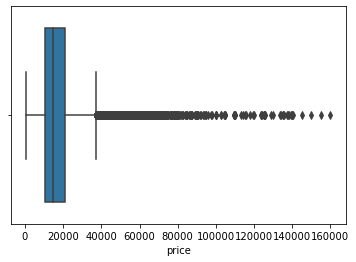

In [135]:
sns.boxplot(alldata["price"])

In [147]:
def detect_outliers(df,features):
        outlier_indices = []
        
        for c in features:
            
            # 1st quartile
            Q1 = np.percentile(df[c],25)
            #3rd quartile
            Q3 = np.percentile(df[c],75)

            #IQR 
            
            IQR = Q3 - Q1
            
            #Outlier step
            
            outlier_step = IQR * 1.5
            
            #detect outlier and their indeces
            
            outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
            
            #store indeces
            
            outlier_indices.extend(outlier_list_col)
            
        outlier_indices = Counter(outlier_indices)
        
        multiple_outliers = list(i for i,v in outlier_indices.items() if v>1)
        
        return multiple_outliers

In [152]:
alldata.loc[detect_outliers(alldata,["price"])]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
248,178,2019,56000,4,26,5,145.0,24.8,3.0
248,127,2019,43785,4,10,5,145.0,30.1,2.5
248,62,2017,9998,2,22001,5,20.0,60.1,1.0
248,33,2017,18998,1,20949,1,0.0,0.0,2.1
248,62,2017,16698,2,24498,1,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
6708,62,2019,17370,2,1038,5,145.0,50.4,1.5
6708,69,2019,41399,4,3183,1,150.0,40.4,2.0
6708,152,2019,49499,1,10,5,145.0,34.5,3.0
6708,109,2015,7998,2,41369,5,200.0,40.9,1.6


In [153]:
alldata.drop(detect_outliers(alldata,["price"]),axis = 0,inplace = True)

In [154]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105351 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         105351 non-null  int16  
 1   year          105351 non-null  int64  
 2   price         105351 non-null  int64  
 3   transmission  105351 non-null  int8   
 4   mileage       105351 non-null  int64  
 5   fuelType      105351 non-null  int8   
 6   tax           105351 non-null  float64
 7   mpg           105351 non-null  float64
 8   engineSize    105351 non-null  float64
dtypes: float64(3), int16(1), int64(3), int8(2)
memory usage: 6.0 MB


# Veriyi test/train olarak ikiye bölme


In [156]:
features = ["model","year","transmission","mileage","fuelType","tax","mpg","engineSize"]
y = alldata["price"].values

x = alldata[features].values

In [157]:
x.shape

(105351, 8)

In [158]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [160]:
x_train.shape

(84280, 8)

In [163]:
x_test.shape

(21071, 8)

# En iyi algoritmayı belirlemek: 

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols=['year','price','mileage','tax','mpg', 'engineSize']
alldata[cols]=scaler.fit_transform(alldata[cols])
alldata.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,-1.444935,-0.585855,1,2.069665,1,0.285657,0.324656,0.626845
1,6,0.428850,1.092815,1,-0.392000,5,0.564759,-0.354480,0.626845
3,1,-0.039596,-0.421176,1,0.166340,1,0.564759,1.003792,-0.284142
4,7,-1.444935,-0.235247,1,0.773169,1,0.774086,-0.005734,2.448821
5,5,-0.508042,-0.192749,1,0.573139,1,0.285657,0.439375,0.626845


In [251]:
models = {'LR' : LinearRegression(), 
          'DT' : DecisionTreeRegressor(), 
          'RF' : RandomForestRegressor(), 
          'XGB' : XGBRegressor(), 
          'KNN' : KNeighborsRegressor()}

In [252]:
for name, model in models.items() :
    print(name)
    print('-'*10)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ## score 
    print('Train Score', r2_score(y_train, model.predict(x_train)))
    print('Validation Score', r2_score(y_test, y_pred))
    print('='*50)

LR
----------
Train Score 0.7072952851292755
Validation Score 0.7007736794504313
DT
----------
Train Score 0.9994550375908166
Validation Score 0.9157733938797258
RF
----------
Train Score 0.9934913890666404
Validation Score 0.9515163691173028
XGB
----------
Train Score 0.9681330346413216
Validation Score 0.9561899227079619
KNN
----------
Train Score 0.9613514956435923
Validation Score 0.933226745992934


# Model Oluşturma

In [253]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
r2_score(y_train, model.predict(x_train))


0.9936585511659732

In [254]:
tahminDizisi = model.predict(x_test)

In [255]:
tahminDizisi

array([ 6264.06,  9662.4 , 36285.88, ..., 11085.16,  7970.04, 11647.04])

In [256]:
tahminDizisi = tahminDizisi.reshape(-1,)

In [257]:
tahminDizisi = pd.Series(tahminDizisi)

In [258]:
tahminDf = pd.DataFrame(y_test)

In [259]:
tahminDf = pd.concat([tahminDf,tahminDizisi],axis = 1)

In [260]:
tahminDf.columns = ["Gerçek Y","Tahmin Y"]

In [261]:
tahminDf

,Gerçek Y,Tahmin Y
0,6495,6264.060000
1,9970,9662.400000
2,38495,36285.880000
3,33000,35951.666667
4,15340,16000.380000
...,...,...
21066,20251,22316.864079
21067,12250,11763.700000
21068,11992,11085.160000
21069,7999,7970.040000


In [262]:
tahminDf.corr()

,Gerçek Y,Tahmin Y
Gerçek Y,1.0000,0.9761
Tahmin Y,0.9761,1.0000


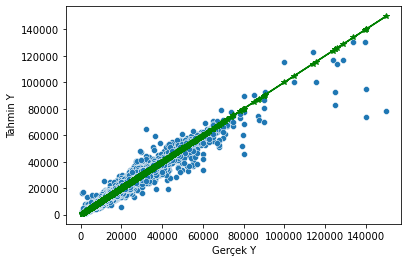

In [269]:
sns.scatterplot(x = "Gerçek Y",y = "Tahmin Y",data = tahminDf)
plt.plot(y_test,y_test,"g-*")